In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
plt.style.use("https://gist.githubusercontent.com/Xylambda/4521dc6404594a715bbc7b75e8c1e2e1/raw/f4f466b27955169abd934428ed98c2be2e1201f2/bpyplot")

In [3]:
plt.rcParams["font.family"] = "Times New Roman"

In [4]:
RESULTS_PATH = Path("results")
DATASETS = ["sine_wave", "white_noise", "venezia", "stock_returns"]
MODELS = [
    "VanillaLSTMPipeline",
    "AttentionLSTMPipeline",
    "EmbeddingLSTMPipeline",
    "AttentionEmbeddingLSTMPipeline"
]

In [5]:
predictions_dict = {}
tests_dict = {}
history_dict = {}

for key in DATASETS:
    
    predictions_dict[key] = {}
    tests_dict[key] = {}
    history_dict[key] = {}
    
    for model in MODELS:
        
        path = RESULTS_PATH / key / model
        
        history_dict[key][model] = pd.read_pickle(path / "history.pkl")
        tests_dict[key][model] = np.load(path / "y_test.npy")
        predictions_dict[key][model] = np.load(path / "y_pred.npy")

In [6]:
def plot_losses(history_dict, figsize=(17,6)):
    fig, ax = plt.subplots(
        len(history_dict),
        2,
        figsize=figsize,
        #sharey="row"
    )
    
    ax[0][0].set_title("Train Loss", fontsize=24)
    ax[0][1].set_title("Validation Loss", fontsize=24)
    
    for i, key in enumerate(history_dict):
        
        ax[i][0].set_ylabel(key.replace("_", " "), fontsize=22)
        
        for j, model in enumerate(history_dict[key]):
        
            tr_loss = history_dict[key][model]['epoch_history']['loss']['train']
            val_loss = history_dict[key][model]['epoch_history']['loss']['validation']
            
            lab = model.replace("Pipeline", "")
            ax[i][0].plot(tr_loss, label=lab)
            ax[i][1].plot(val_loss, label=lab)
            
            #ax[i][0].grid(True)
            #ax[i][1].grid(True)     

    ax[i][1].legend(fontsize=18)
    plt.savefig("img/loss_.png", transparent=True)

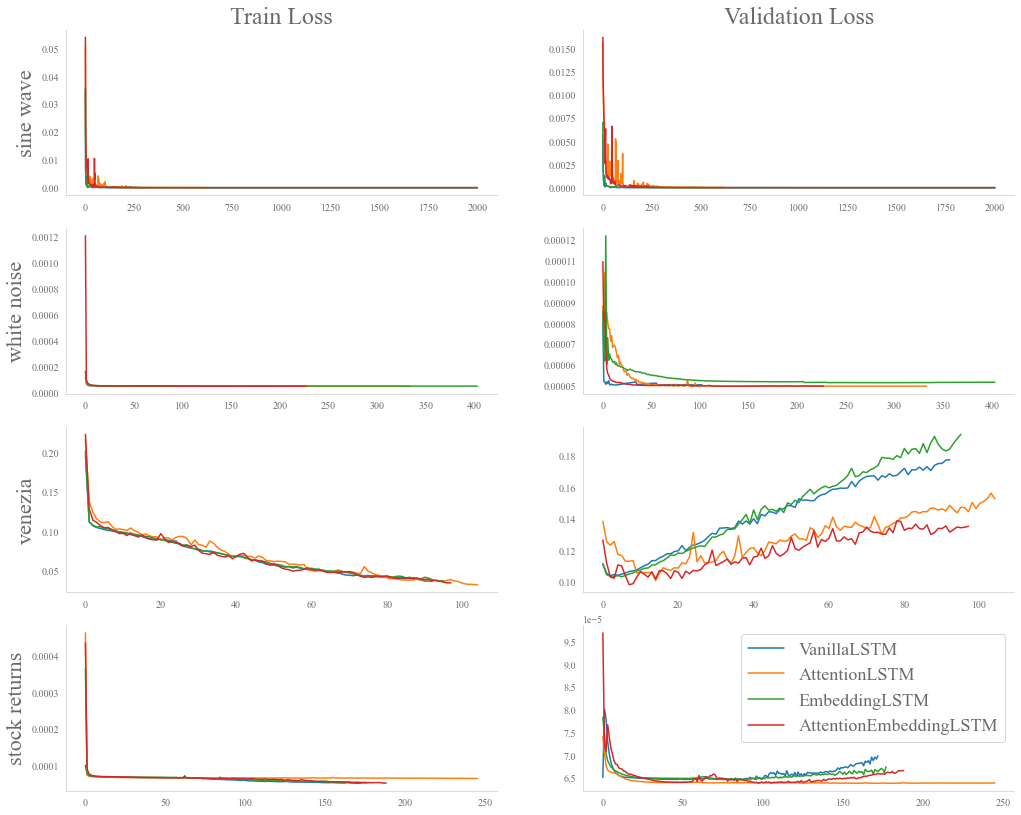

In [7]:
plot_losses(history_dict, figsize=(17,14))

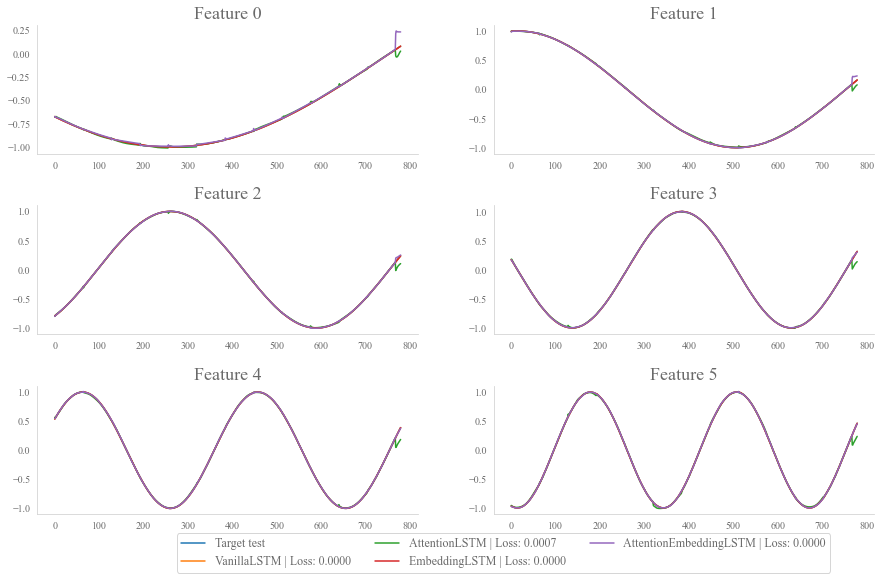

In [8]:
dataset = "sine_wave"
model = "AttentionEmbeddingLSTMPipeline"  # same tests for all models

tsts = tests_dict[dataset][model]

fig, ax = plt.subplots(3, 2, figsize=(15, 9))
ax = ax.ravel()

for col in range(tsts.shape[1]):
    
    _tst = tsts[:, col]
    ax[col].plot(_tst, label='Target test')
    
    for model in MODELS:
        preds = predictions_dict[dataset][model]
        _pred = preds[:, col]

        loss = np.mean((_pred - _tst)**2)
        _rep = model.replace("Pipeline", "")
        key = f"{_rep} | Loss: {loss:.4f}"
        ax[col].plot(_pred, label=key)
        ax[col].set_title(f"Feature {col}", fontsize=18)

    #ax[col].grid()

ax[col].legend(fontsize=12, ncol=3, bbox_to_anchor=(0.9, -0.1))
plt.subplots_adjust(hspace=0.4)
#plt.tight_layout()
plt.savefig("img/sine.png", transparent=True)

-------

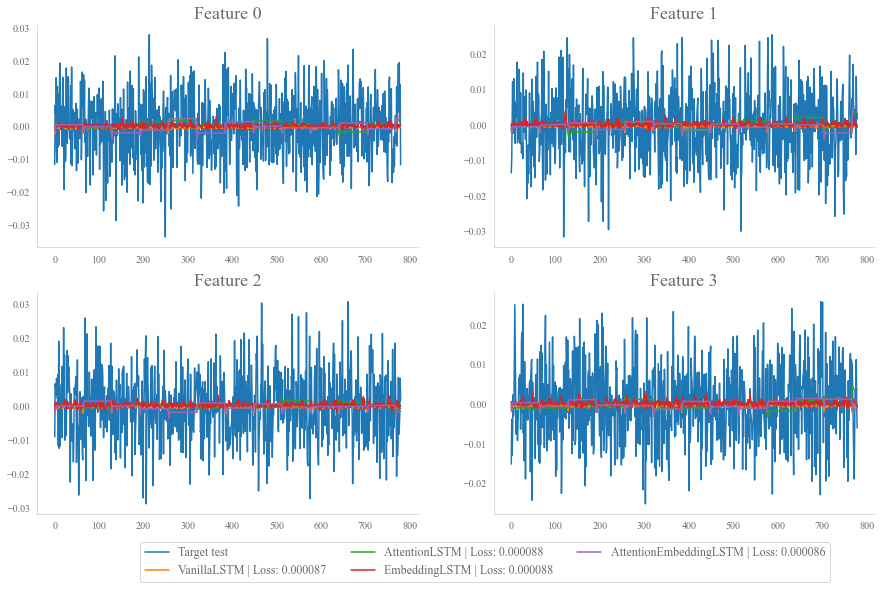

In [9]:
dataset = "white_noise"
model = "AttentionEmbeddingLSTMPipeline"  # same tests for all models

tsts = tests_dict[dataset][model]

fig, ax = plt.subplots(2, 2, figsize=(15, 9))
ax = ax.ravel()

for col in range(tsts.shape[1]):
    
    _tst = tsts[:, col]
    ax[col].plot(_tst, label='Target test')
    
    for model in MODELS:
        preds = predictions_dict[dataset][model]
        _pred = preds[:, col]

        loss = np.mean((_pred - _tst)**2)
        _rep = model.replace("Pipeline", "")
        key = f"{_rep} | Loss: {loss:.6f}"
        ax[col].plot(_pred, label=key)
        ax[col].set_title(f"Feature {col}", fontsize=18)

    #ax[col].grid()

ax[col].legend(fontsize=12, ncol=3, bbox_to_anchor=(0.9, -0.1))
#plt.tight_layout()
plt.savefig("img/noise.png", transparent=True)

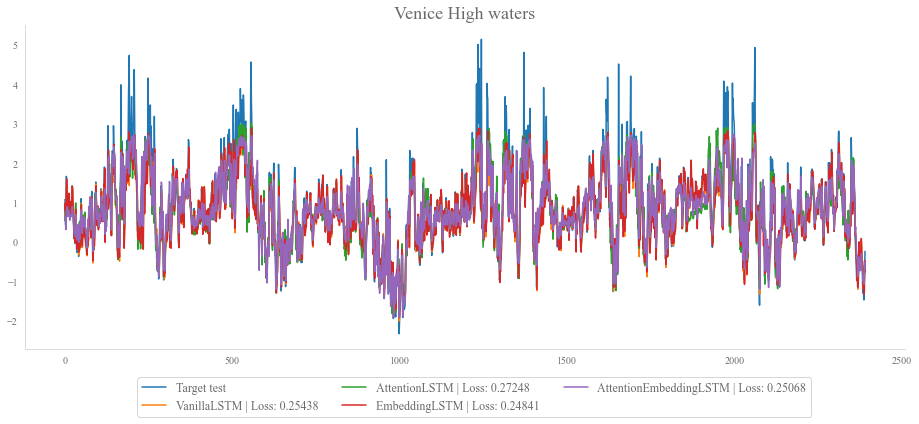

In [10]:
dataset = "venezia"
model = "EmbeddingLSTMPipeline"  # same tests for all models

tsts = tests_dict[dataset][model]

fig, ax = plt.subplots(1, 1, figsize=(13, 6))
#ax = ax.ravel()

for col in range(tsts.shape[1]):
    
    _tst = tsts[:, col]
    ax.plot(_tst, label='Target test')
    
    for model in MODELS:
        preds = predictions_dict[dataset][model]
        _pred = preds[:, col]

        loss = np.mean((_pred - _tst)**2)
        _rep = model.replace("Pipeline", "")
        key = f"{_rep} | Loss: {loss:.5f}"
        ax.plot(_pred, label=key)
        ax.set_title(f"Venice High waters", fontsize=18)

    #ax.grid()

ax.legend(fontsize=12, ncol=3, bbox_to_anchor=(0.9, -0.07))
plt.tight_layout()
plt.savefig("img/venice.png", transparent=True)

-----

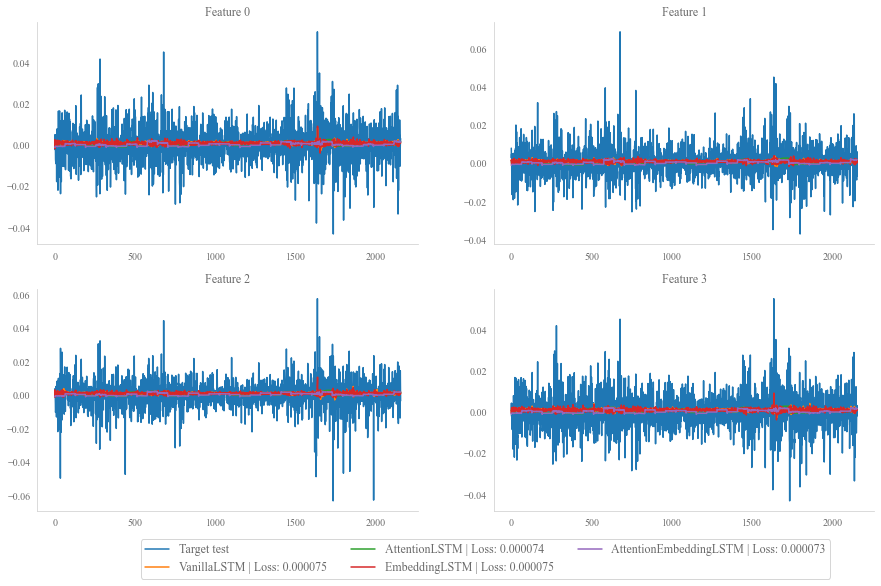

In [11]:
dataset = "stock_returns"
model = "AttentionEmbeddingLSTMPipeline"  # same tests for all models

tsts = tests_dict[dataset][model]

fig, ax = plt.subplots(2, 2, figsize=(15, 9))
ax = ax.ravel()

for col in range(tsts.shape[1]):
    
    _tst = tsts[:, col]
    ax[col].plot(_tst, label='Target test')
    
    for model in MODELS:
        preds = predictions_dict[dataset][model]
        _pred = preds[:, col]

        loss = np.mean((_pred - _tst)**2)
        _rep = model.replace("Pipeline", "")
        key = f"{_rep} | Loss: {loss:.6f}"
        ax[col].plot(_pred, label=key)
        ax[col].set_title(f"Feature {col}")

    #ax[col].grid()

ax[col].legend(fontsize=12, ncol=3, bbox_to_anchor=(0.9, -0.1))
#plt.tight_layout()
plt.savefig("img/stock.png", transparent=True)

----